# aNaLysis of the Egg Redditer Viewer Census Data

In [1581]:
import numpy as np
import pandas as pd
import os, json, shutil
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_excel(r"Northernlion's Community Census.xlsx")

After exporting the excel file, we can view an overview of the df here: 

In [3]:
df

,Date,How old are you?,Where are you from?,What's your gender?,What's your sexuality?,Are you in a relationship?,Do you have any children?,In what area do you work at?,Where do you align yourself politically,What's your religion?,How long ago did you start watching NL?,On average how much content do you consume in a week?,How did you find NL?,Where do you most watch NL?,Northernlion?,How likely do you think it is that you will still be watching NL in 5 years time?,Shiny dome
0,2022-08-05 15:07:17.552,15-25 years old,Europe,Male,Straight,"Yes, it's my first one","No, but I want to have",Health and medicine,2.0,Atheist,10 years,7-10 hours,Isek,YouTube,Ryab,5.0,Yes
1,2022-08-05 15:23:16.732,26-35 years old,North America,Male,Straight,"No, but I have before","No, and I don't want to have","Installation, repair and maintenance",3.0,Atheist,6 years,4-6 hours,Dan Gheesling,Twitch,Egg,4.0,Yes
2,2022-08-05 15:40:15.516,15-25 years old,Europe,Male,Bisexual,"No, and I haven't before","No, but I want to have",Law and public policy,3.0,Atheist,8 years,>24 hours,YouTube recommendations,Twitch,NL,4.0,Yes
3,2022-08-05 15:40:30.772,15-25 years old,Europe,Male,Straight,"No, but I have before","No, but I want to have",Architecture and engineering,4.0,Christianity,7 years,11-15 hours,Isek,YouTube,Enele,4.0,Yes
4,2022-08-05 15:40:48.556,26-35 years old,North America,Male,Straight,"No, but I have before","No, and I don't want to have","Installation, repair and maintenance",2.0,Atheist,10 years,4-6 hours,Isek,YouTube,NL,3.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5018,2022-09-21 02:54:11.957,26-35 years old,North America,Male,Straight,"Yes, but it's not my first one","No, but I want to have","Business, management and administration",3.0,Atheist,2 years,4-6 hours,Isek,YouTube,NL,4.0,Yes
5019,2022-09-23 13:39:51.377,15-25 years old,North America,Male,Straight,"No, but I have before","No, but I want to have",Science and technology,2.0,Agnostic,8 years,2-3 hours,Friend recommendation,YouTube,Ryab,3.0,Yes
5020,2022-09-23 14:04:40.107,15-25 years old,Europe,Male,Straight,"No, and I haven't before","No, and I don't want to have",Science and technology,3.0,Agnostic,11 years,4-6 hours,Isek,Twitch,NL,4.0,Yes
5021,2022-09-30 09:38:04.021,15-25 years old,Europe,Male,Straight,"No, and I haven't before","No, and I don't want to have",Science and technology,3.0,Atheist,11 years,11-15 hours,Isek,Twitch,Egg,5.0,Yes


In [1492]:
# NaN values
for m in range(len(df.columns)):
    print(f"{m}th column, {df.iloc[:,m].isna().sum()} NaNs.")

0th column, 0 NaNs.
1th column, 0 NaNs.
2th column, 0 NaNs.
3th column, 0 NaNs.
4th column, 0 NaNs.
5th column, 0 NaNs.
6th column, 0 NaNs.
7th column, 0 NaNs.
8th column, 106 NaNs.
9th column, 1 NaNs.
10th column, 0 NaNs.
11th column, 0 NaNs.
12th column, 0 NaNs.
13th column, 0 NaNs.
14th column, 0 NaNs.
15th column, 16 NaNs.
16th column, 0 NaNs.


Here we see that the 8th question on political alignment has 106 NaNs, the 9th question 1 NaN and and the 15th question 16 NaNs. These will be cleaned respectively prior to the question's analysis.

## Introduction

The questionnaire consists of 16 questions, structured into the overarching groups: demographic factors, personal details, NL-related questions, and Shiny dome. In total, 5023 people responded over a period of 2 months, when it was finally closed on 30 September.

### Time of submission

In [311]:
# Convert to standardised datetime
df2 = df.copy().loc[:,['Date']]
df2['Date'] = pd.to_datetime(df2['Date'])

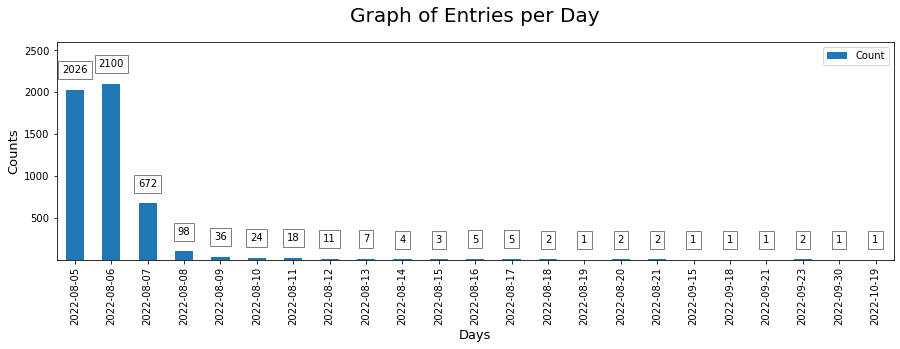

In [324]:
def addlabels(y):
    for i in range(len(y)):
        ax.text(i, y[i]+200, y[i], ha = 'center', bbox = dict(facecolor = 'white', alpha = .5))
    return

# Grouped by date
grouped_df = df2.groupby(df2["Date"].dt.date).size().to_frame("Count").reset_index()
# here we set a new index using the datetime column
datetime_series = pd.to_datetime(grouped_df['Date'])
datetime_index  = pd.DatetimeIndex(datetime_series.values)
grouped_df.set_index(datetime_index, inplace=True)
grouped_df.sort_index(inplace=True)

# # we change the FREQUENCY of the dataframe using asfreq
# grouped_df_filled = grouped_df.asfreq('D')

fig, ax = plt.subplots(figsize=(15,4)) 
# grouped_df_filled.plot(kind='bar', x = 'Date', y='Count', ax = ax)
grouped_df.plot(kind='bar', x = 'Date', y='Count', ax = ax)

ax.set_title('Graph of Entries per Day',fontsize = 20, pad = 20);
ax.set_xlabel('Days',fontsize = 13)
ax.set_ylabel('Counts',fontsize = 13);
ax.set_ylim([min(grouped_df['Count']), max(grouped_df['Count'])+500])

addlabels(grouped_df['Count'])

plt.show()

This graph shows the daily response rate over the 2 months the survey was active. The bulk of submissions were in the first 3 days, and tapered off quickly after the 3rd day. An additional outlying data point is courtesy of yours truly, who missed the quiz submission deadline and pulled some strings to access the quiz by being in charge of (voluntary) data analysis.

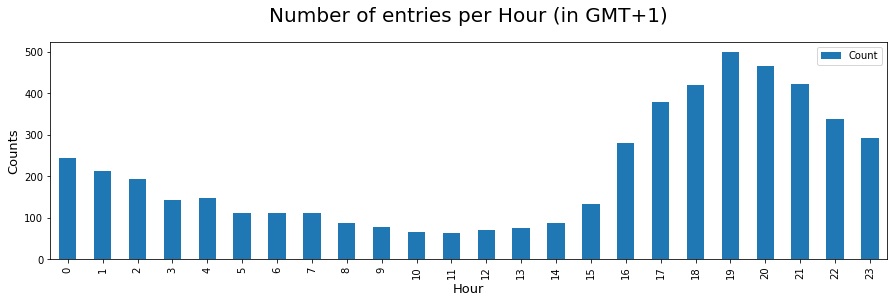

In [344]:
def plotgraph(df2, column, title):
    # Grouped by Time
    grouped_df = df2.groupby(df2[column].dt.hour).size().to_frame("Count").reset_index()
    # here we set a new index using the datetime column
    datetime_series = pd.to_datetime(grouped_df[column])
    datetime_index  = pd.DatetimeIndex(datetime_series.values)
    grouped_df.set_index(datetime_index, inplace=True)
    grouped_df.sort_index(inplace=True)

    fig, ax = plt.subplots(figsize=(15,4)) 
    grouped_df.plot(kind='bar', x = column, y='Count', ax = ax)

    ax.set_title(title,fontsize = 20, pad = 20);
    ax.set_xlabel('Hour',fontsize = 13)
    ax.set_ylabel('Counts',fontsize = 13);

    plt.show()
    
plotgraph(df2, 'Date','Number of entries per Hour (in GMT+1)')

This graph shows the time of the entries submitted, in the timezone of GMT+1. Bearing in mind that the bulk of viewers (64%, to be shown later) are in North America (GMT-4 to GMT-7), the peak at 19:00 would correspond to roughly 12:00 to 13:00 in NA, which makes sense as lunchtime is a good time to be surfing reddit at work (Guilty!).

In [318]:
df3 = df.iloc[:,[0,2]]
df3['Date'] = df3['Date'].apply(pd.to_datetime)
def timezone(x):
    if x == 'Europe': # GMT+2
        return 1
    if x == 'North America': # GMT-4 to GMT-7
        return -6.5
    if x == 'Oceania': # GMT+11
        return 10
    if x == 'Asia': # GMT+6 to GMT+9
        return 6.5
    if x == 'South America': # GMT-2 to GMT-5
        return -4.5
    if x == 'Africa': # GMT-1 to GMT+4
        return 1.5
    return 0
        
df3['Timezone'] = df3['Where are you from?'].apply(timezone)

In [320]:
def timeconvert(row):
    TZ = row.Timezone
    finaltime = row.Date + datetime.timedelta(hours = int(TZ), minutes = (TZ-int(TZ))*60)
    return finaltime

df3['RealTime'] = df3.apply(timeconvert, axis = 1)

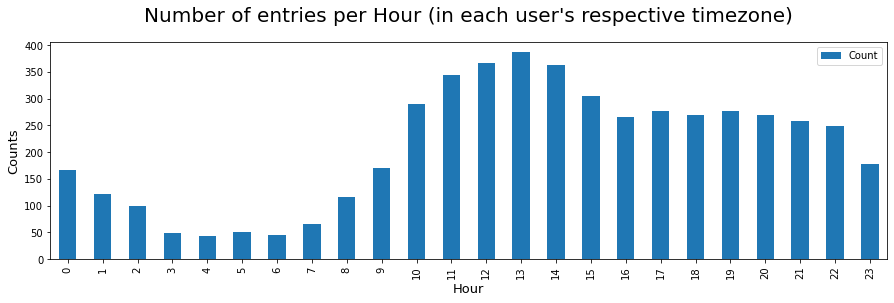

In [345]:
plotgraph(df3, 'RealTime',"Number of entries per Hour (in each user's respective timezone)")

This graph shows a "corrected" submission time according to the estimated timezone of each user based on their submitted continent. For each of the continents, I took the average timezone of the region and added or subtracted the respective time difference. The timezones used can be seen in my if statements of the conversion function.

As to be expected, a bulk of the submissions now come within the normal waking hours of a human being, although there are still entries coming from the dead of the night (3-5am). However, bear in mind that there is a maximum of 2.5h time error for each continent's timezone as I had no choice but to take the average.

## Demographics

In [1457]:
# Graph plotting function

def plotpiengraph(QNUM, df, X_label, THRES=None, graphothers = False, sort_by=None, legloc = None, color = None):
    split = df.value_counts()
    
    if THRES:
        labels = list(split.index[:THRES])+[('Others',)]
        labels = [m[0] for m in labels]
        sizes = list(split.values[:THRES])+[sum(split.values[THRES:])]
    else:
        labels = split.index
        labels = [m[0] for m in labels]
        sizes = split.values
    
    labels2 = [f"{a} ({b/sum(sizes):.1%})" for a, b in zip(labels, sizes)]

    fig, ax = plt.subplots(1,2, figsize = (20,8))

    ax[0].set_title(f'Q{QNUM}: {df.columns[0]}',fontsize = 15, pad = 20);
    if color:
        patches, texts = ax[0].pie(sizes, shadow=True, startangle=90, colors = color)
    else:
        patches, texts = ax[0].pie(sizes, shadow=True, startangle=90)
    
    if legloc:
        ax[0].legend(patches, labels2, bbox_to_anchor=(0.5, -0.3), loc=legloc, borderaxespad=0)
    else:
        ax[0].legend(patches, labels2, loc = "best")
    ax[0].axis('equal')
    
    ax[1].set_title(f'Graph of All Responses to Q{QNUM}',fontsize = 15, pad = 20);
    if sort_by:
        if graphothers:
            xvals, yvals = [labels[m] for m in sort_by], [sizes[m] for m in sort_by]
        else:
            xvals, yvals = [split.index[m][0] for m in sort_by], [split.values[m] for m in sort_by]
    else:
        xvals, yvals = labels, sizes
    
    plt.bar(xvals, yvals, color = color)
    ax[1].xaxis.set_ticks(xvals)
    ax[1].xaxis.set_ticklabels(xvals, rotation=90, fontsize = 12)
    ax[1].set_xlabel(X_label,fontsize = 12)
    ax[1].set_ylabel('Counts',fontsize = 12);
    ax[1].set_ylim([0, max(split.values)*1.1])
    
    def addlabels(x, y, incr):
        for i in range(len(y)):
            if not isinstance(x[0],str):
                ax[1].text(x[i], y[i]+incr, y[i], ha = 'center', bbox = dict(facecolor = 'white', alpha = .5))
            else:
                ax[1].text(i, y[i]+incr, y[i], ha = 'center', bbox = dict(facecolor = 'white', alpha = .5))
        return
    
    addlabels(xvals, yvals, int(0.05*(max(split.values))) )

#     plt.tight_layout()
    plt.show()

### Age

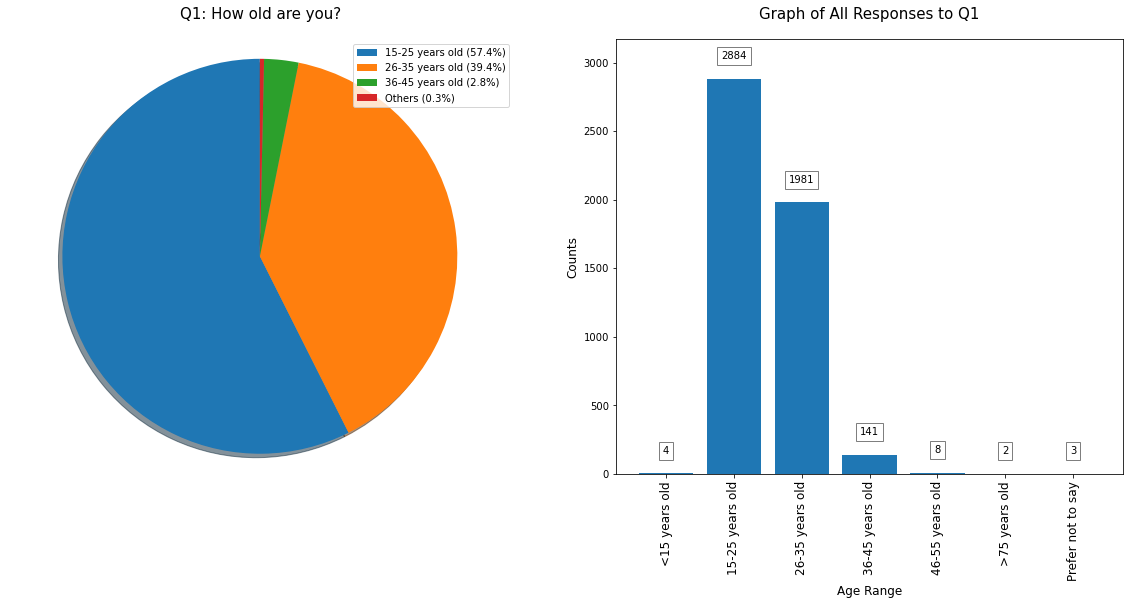

In [703]:
plotpiengraph(1, df.iloc[:,[1]], 'Age Range', THRES=3, sort_by=[4, 0, 1, 2, 3, 6, 5])

For the first question, the majority of the population were teenagers to young adults as expected, although the age ranges as originally posed in the questionnaire were a little large (and weirdly chosen) to offer much more useful information. To summarise, 97% of the population were aged 15-35 years old, with 57% under 25 and 39% from 26-35 years old. Notwithstanding the missing age range of 55 to 75 years, the 2 septuagenarians in this dataset are more than likely jokesters, being asexual individuals with more than 3 children. See the next cell for their highly outlying responses. 

Perhaps a future census can have the age question be open-ended so that the final binning of ages can be done post-hoc, and with the age ranges chosen to be more meaningful. Again, bear in mind that this survey was distributed on reddit, and children under the age of 13 are _technically_ not allowed to create an account, so this survey's results is subjected to selection bias. 

In [657]:
df[df['How old are you?']=='>75 years old']

,Date,How old are you?,Where are you from?,What's your gender?,What's your sexuality?,Are you in a relationship?,Do you have any children?,In what area do you work at?,Where do you align yourself politically,What's your religion?,How long ago did you start watching NL?,On average how much content do you consume in a week?,How did you find NL?,Where do you most watch NL?,Northernlion?,How likely do you think it is that you will still be watching NL in 5 years time?,Shiny dome
509,2022-08-05 18:45:56.472,>75 years old,Oceania,Trans woman,Asexual,"Yes, but it's not my first one","Yes, I have 3","Farming, fishing and forestry",10.0,Christianity,8 years,15-24 hours,TikTok,Twitch,Tom,5.0,Yes
2477,2022-08-06 03:35:52.148,>75 years old,Africa,Non-Binary,Asexual,"No, and I haven't before","Yes, I have more than 3","Farming, fishing and forestry",5.0,Non-binary,Prefer not to say,Prefer not to say,Activity Gym,Twitch,He’s Bald?!?,5.0,Yes


The rare breed of >75-year-olds (allegedly) who watch NL 

### Location

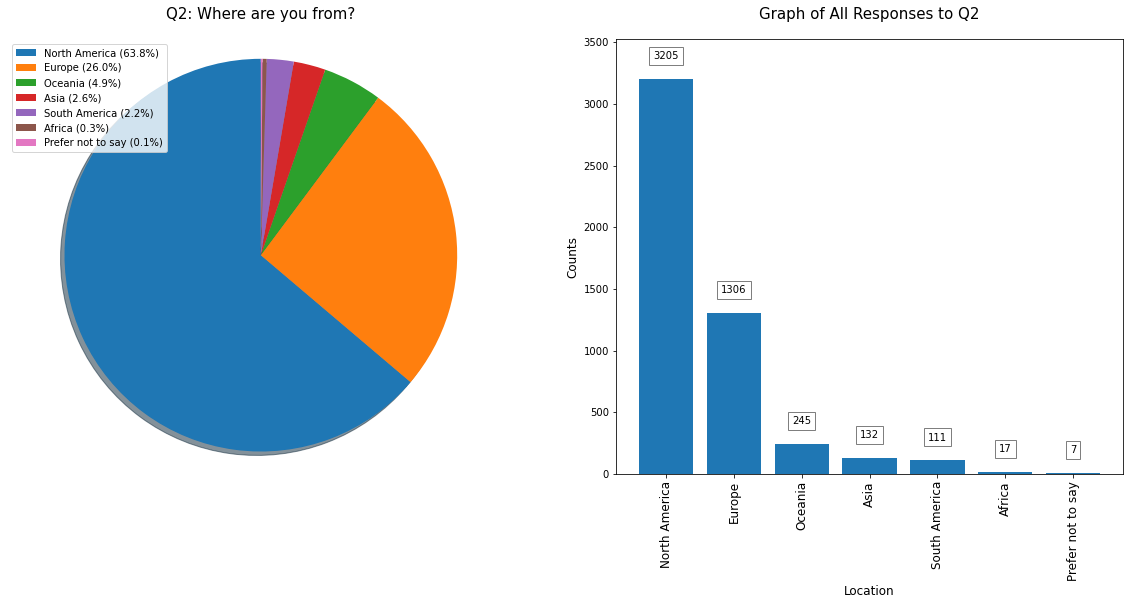

In [704]:
plotpiengraph(QNUM=2, df=df.iloc[:,[2]], X_label='Location')

The preponderance of responses hailing from North America (64%) is to be expected, with the next 26% of viewers being European, and Oceania, Asia and South America each accounting for a small minority each. Finally, a full 0.3% (17) of viewers actually come from Africa, although 1 of them is an obvious joker, being an Asexual Non-Binary African over the age of 75 with more than 3 children.

### Gender

In [1598]:
# Pre-cleaning
df.iloc[:,3].value_counts()

Male                                                                                                                      4233
Female                                                                                                                     301
Non-Binary                                                                                                                 213
Trans woman                                                                                                                210
Prefer not to say                                                                                                           31
Trans man                                                                                                                   16
MtF                                                                                                                          4
Bigender (woman + non-binary)                                                                                  

In [1597]:
# Post-cleaning
def cleanstr(x):
    x = str(x).strip()
    return x[0].upper() + x[1:]

gendf = df.iloc[:,[3]]
gendf["What's your gender?"] = gendf["What's your gender?"].apply(cleanstr)
gendf = gendf.replace({'MtF': 'Trans woman', 'FtM':'Trans man', 'Genderfluid': 'Gender fluid'})
gendf.value_counts()

What's your gender?                                                                                                   
Male                                                                                                                      4233
Female                                                                                                                     301
Trans woman                                                                                                                214
Non-Binary                                                                                                                 213
Prefer not to say                                                                                                           31
Trans man                                                                                                                   17
Gender fluid                                                                                                           

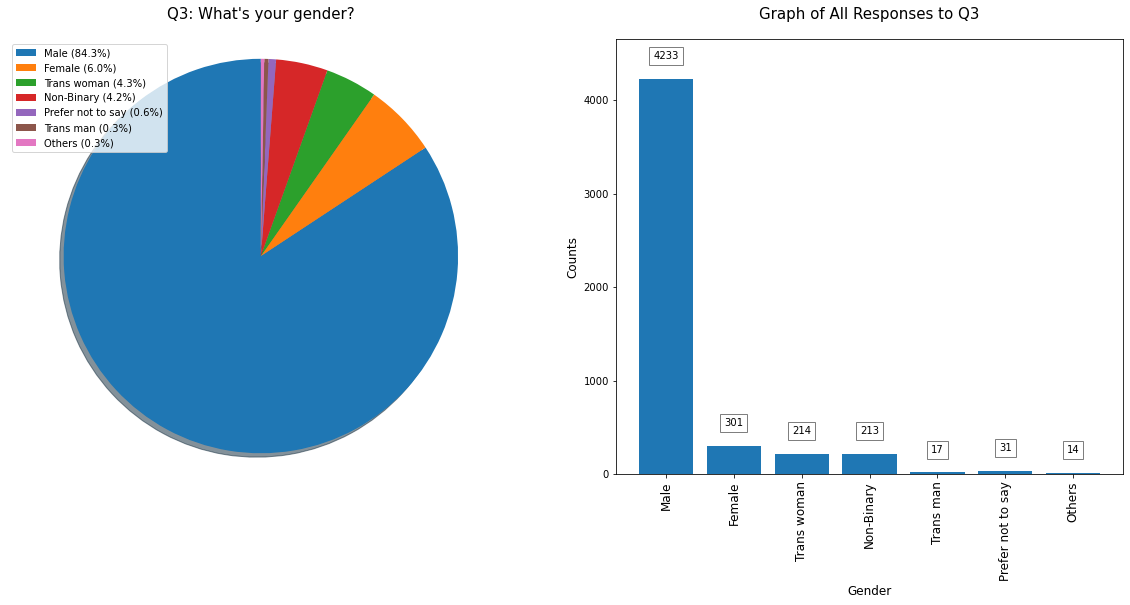

In [705]:
plotpiengraph(QNUM=3, df=gendf, THRES=6, sort_by=[0, 1, 2, 3, 5, 4, 6], X_label='Gender', graphothers = True)

For this section, I did a little data cleaning of replacements of FtM and Mtf, and some slight correction from spaces. As to be expected, the population of NL's viewers are predominantly male (84%), with females and non-binary individuals making up 6% and 4.2% respectively, and trans women also making up a sizeable minority (4.2%). Trans men made up only 0.3%, and other genderqueer (1), genderfluid (2), bigender (3), questioning/figuring it out (2) individuals were combined into the Others section. However, the Others section contained a few unique responses to serve a few purposes, as listed below:
- To raise outrage ('I was gonna shit on how bad this is until i realized multiple people already corrected you on this so'
- Joke answers ('Pistachio', 'Attack helicopter', 'Egg', 'Lmao')
- 'Any'

To read the responses in their entirety, you can open the collapsed cells above (before and after cleaning). Also, please forgive me for any mistakes made in grouping together the non-cisgender identities as these do tend to be confusing.

### Sexuality

In [1584]:
# Pre-cleaning
df.iloc[:,4].value_counts();

In [1585]:
# Post-cleaning
sexdf = df.iloc[:,[4]]
sexdf["What's your sexuality?"] = sexdf["What's your sexuality?"].apply(cleanstr)
sexdf = sexdf.replace({'Pan':'Pansexual'})
sexdf.value_counts();

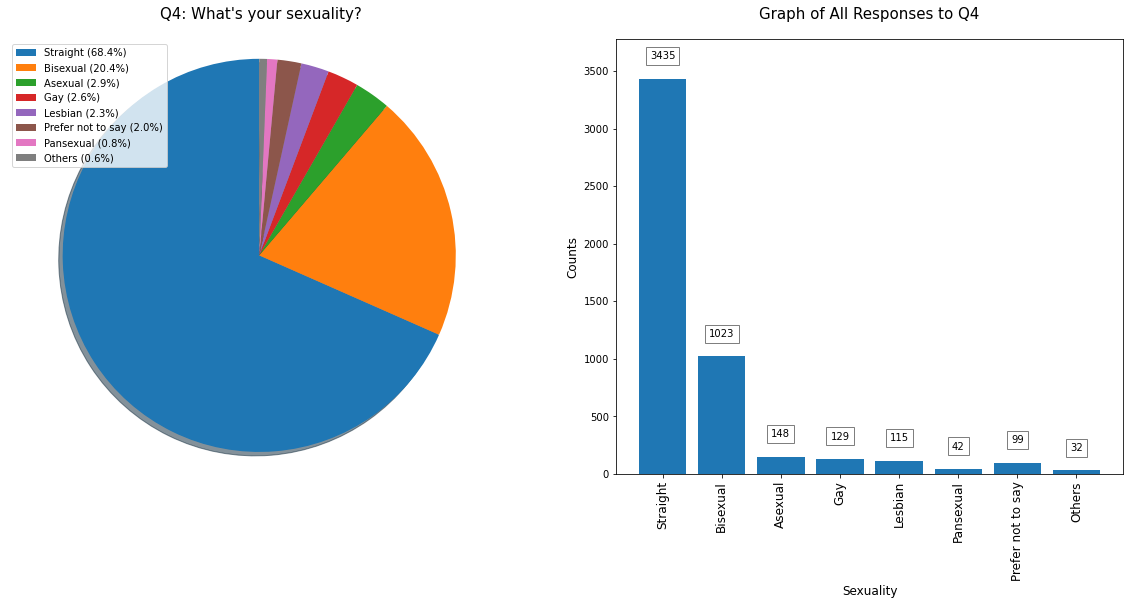

In [706]:
plotpiengraph(QNUM=4,df = sexdf, THRES=7, sort_by = [0, 1, 2, 3, 4, 6, 5, 7], X_label='Sexuality', graphothers = True)

If the previous question was hard to summarise, this next one was even more of a headache, and I chose to sidestep all the trouble by lumping all the entries which had 5 or less responses into 'Others'. To begin with, after acknowledging the obvious majority of the Straights (68%), the next largest segment are Bisexual (20%), followed by Asexual (3%), Gay (2.6%), Lesbian (2.3%) and Pansexual (0.8%). Among the "Others", those with more than 1 response compose of:
- Queer (5)
- Demisexual (3)
- Straight but I like femboys 😳 (2)
- Bicurious (2)

The following 20 answers had 1 response each:
-  Aromantic
-  Aromantic/Bisexual
-  Confused
-  Eggsexual
-  Eggslut
-  Finsexual
-  Fucked
-  Gynesexual
-  I don't fucking know man
-  Idk lol
-  It’s complicated – still figuring it out.
-  Neptunic
-  Onaholesexual
-  Panromantic Asexual
-  Queer straight
-  Queer/Gay/Bisexual
-  Questioning
-  Super Straight
-  Unsure
-  Yeah

## Personal Details

### Relationship Status

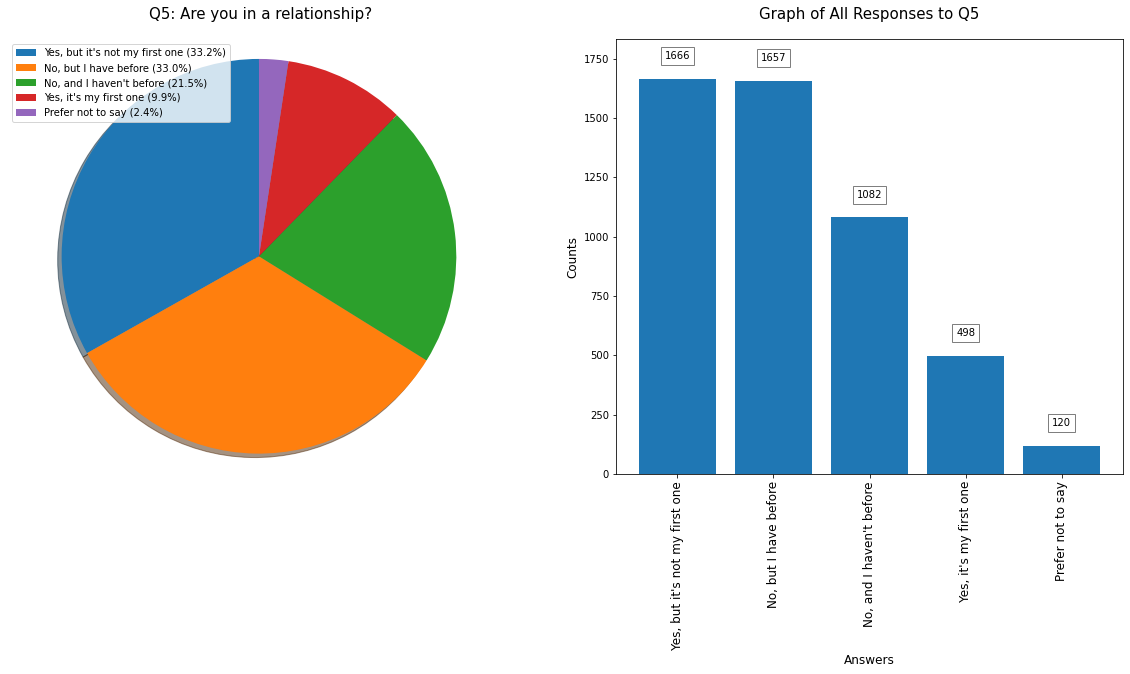

In [707]:
plotpiengraph(QNUM=5,df = df.iloc[:,[5]], X_label='Answers')

Nearly equal thirds of the people here answered either "Yes, but not my first one" (33.2%) or "No, but I have before" (33%) to this question, while 21.5% answered "No, and haven't before" and 9.9% answered "Yes, it's my first one". This means that a full 43.1% of the surveyed population are in a relationship right now, and at least 76.1% have been in a relationship before, which some people in the subreddit expressed great incredulity at. To which, I say  ¯\\\_(ツ)_/¯

### Children

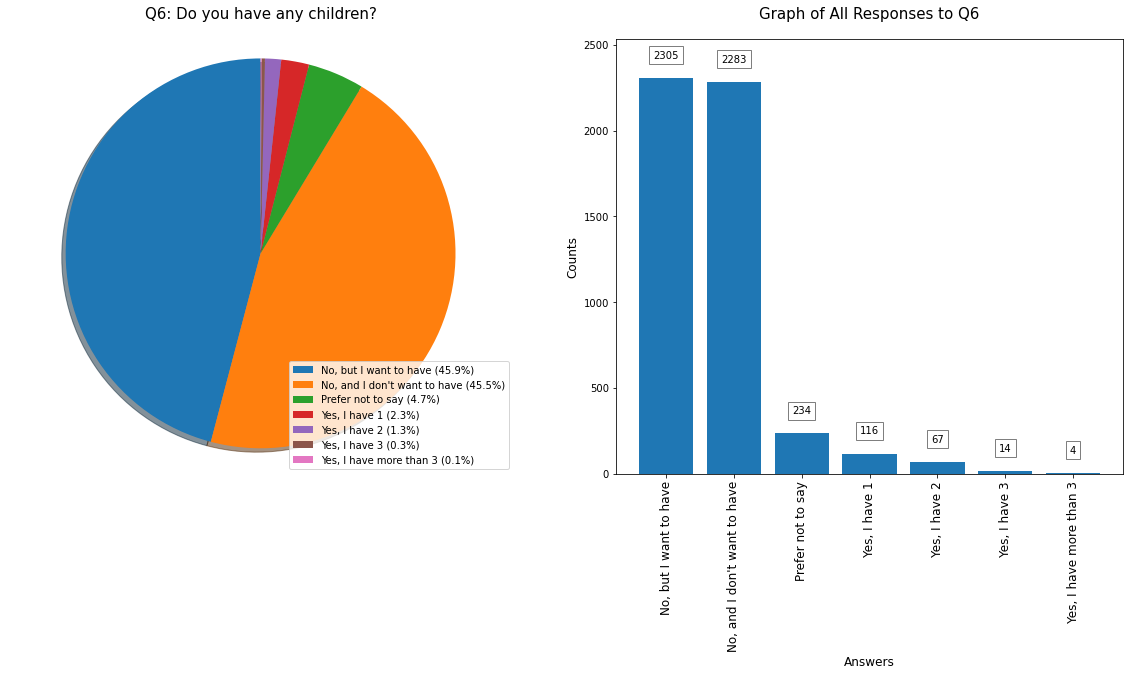

In [708]:
plotpiengraph(QNUM=6,df = df.iloc[:,[6]], X_label='Answers')

Again, with an almost even split between "No, but I want to have" (45.9%) and "No, and I don't want to have" (45.5%), this represents a victory of the natalists over the child-free among us. A full 4.0% of responders have children, with 4 responders having more than 3 children. However, one of them is the previously identified 75 year old asexual who's never been in a relationship.

### Area of Work

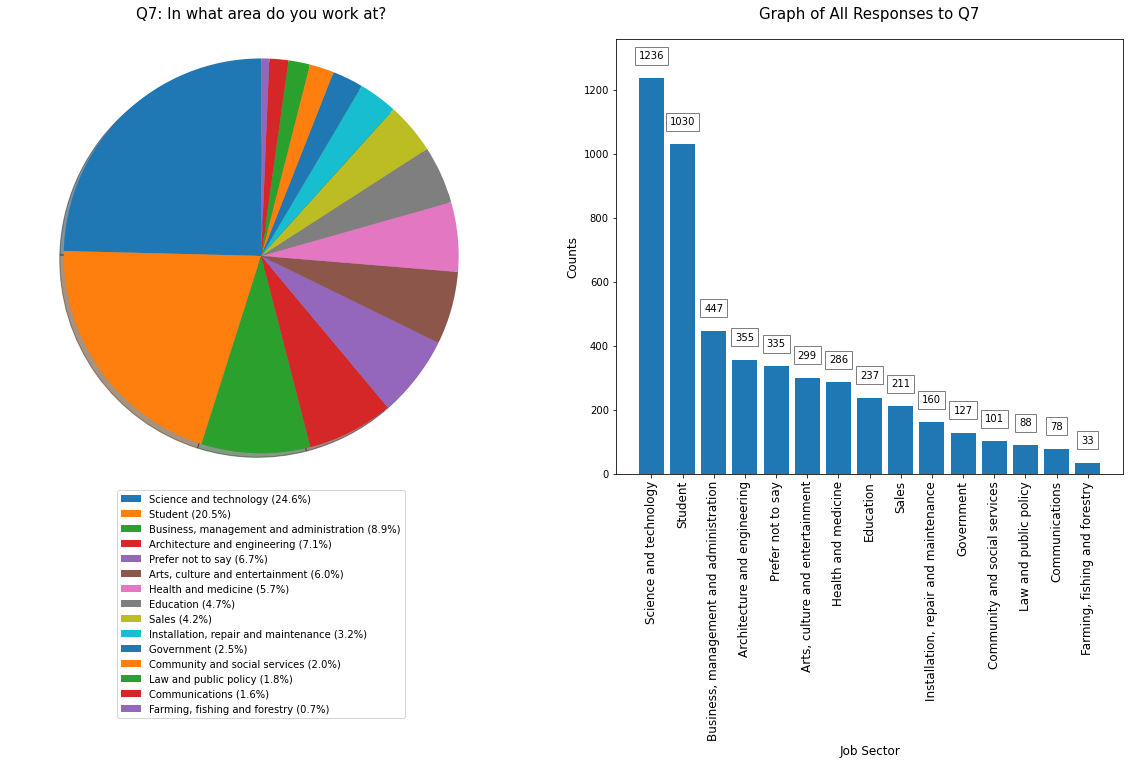

In [709]:
plotpiengraph(QNUM=7,df = df.iloc[:,[7]], X_label='Job Sector', legloc = 'center')

"Science and tech" being the top response, taking up almost a quarter of the responders, and dwarfing the next largest profession - business (8.9%), is worth investigating. Students make up slightly over 1/5 (20.5%), which would roughly comprise 35% of the 15-25 year old range previously highlighted in the age question. In general, it would be interesting to compare this distribution to the average redditer's distribution, or the average twitch viewer's distribution, or even just the average job distribution of the world, although I am lazy to match the professions in this link: https://www.cedefop.europa.eu/en/tools/skills-intelligence/employed-population-sector-and-occupation?year=2020&country=EU&sector=#1 to the categories in this question.

I have a few theories to why 'Science and tech' is so highly represented. 1. Gamers tend to be tech-savvy which aids them in finding a job in the tech sector. 2. People who enjoy playing highly min-max games like Isaac also tend to be more analytical, predisposing them to find jobs in science and tech. 3. The current millenial generation also have a higher tendency to hold science and tech jobs, due to the booming tech sector over the past two decades, so this distribution is a reflection of the age distribution of the viewers. 4. I might just be talking out of my ass for the previous 3 reasons.

### Political Alignment

In [1416]:
poldf = df.iloc[:,[8]]
poldf = poldf.replace({np.nan: 'Did not reply'})
poldf[poldf.columns[0]] = poldf[poldf.columns[0]].apply(str)

A little cleaning had to be done here to replace the NaNs with "Did not reply".

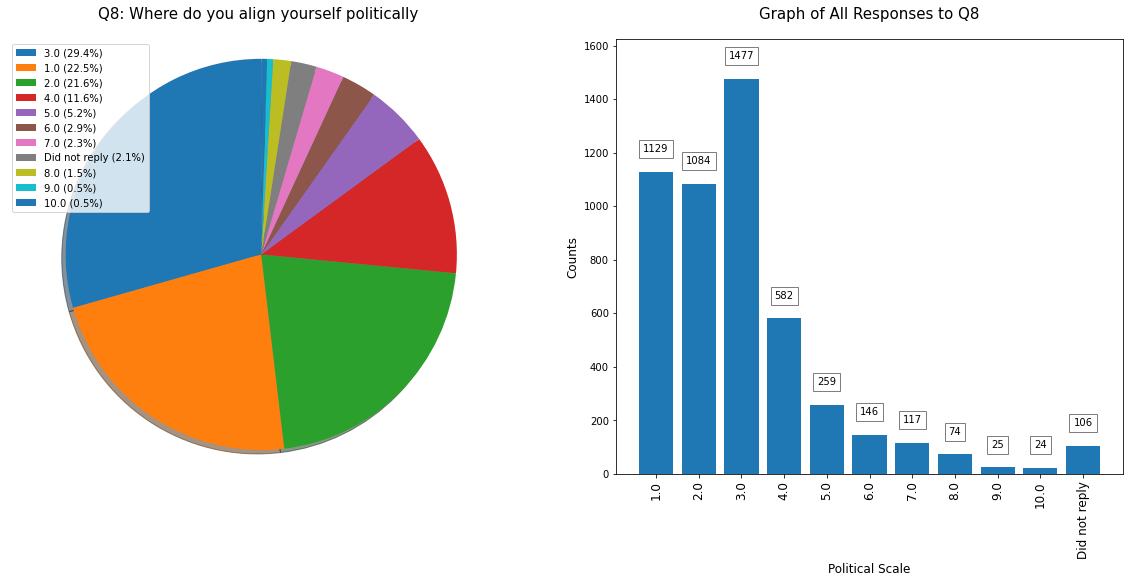

In [1423]:
plotpiengraph(QNUM=8,df = poldf, X_label='Political Scale', sort_by = [1,2,0,3,4,5,6,8,9,10,7])

In [1451]:
kk = sorted(df.iloc[:,8].dropna())
print(f"Mean: {np.mean(kk):.2f}, Mode: {df.iloc[:,8].value_counts().index[0]}, Median: {kk[len(kk)//2]}")

Mean: 2.87, Mode: 3.0, Median: 3.0


Nothing much to say here, most responders identify as 3.0 on the scale (30%), with 1.0 and 2.0 at 23% and 22% respectively, and 4.0 making up 11.8%. This makes up 86.8% with 4.0 or less, which is to be expected of the left-leaning young adult population who watch NL (who is pretty centre-left too). If we include the 5.3% who are 5.0 on the scale, 92.1% profess to be left leaning while the other 7.9% are right-leaning, with the 1% answering 9.0 and 10.0 on the scale possibly either trolling or watching NL to feel rage.

### Religion

In [1599]:
# Pre-cleaning
for a, b in zip(df.iloc[:,9].value_counts().index,df.iloc[:,9].value_counts().values):
     print(f'{a},\t {b}')

Atheist,	 2314
Agnostic,	 1650
Christianity,	 585
Prefer not to say,	 183
Judaism,	 82
Islam,	 44
Buddhism,	 39
Hinduism,	 14
None,	 9
Sikhism,	 6
Satanism,	 4
Pagan,	 4
Catholic,	 4
Wiccan,	 3
Not religious,	 3
none,	 2
Deist,	 2
No religion,	 2
Asatru,	 2
Catholic ,	 2
Gnostic,	 2
Wicca,	 2
Mostly learning about them all and trying to uphold a value of beliefs,	 1
Heathen/Norse Pagan ,	 1
Shamanismn,	 1
Panantheism,	 1
Free thinker ,	 1
Jedi,	 1
Apatheistic,	 1
apatheist,	 1
idk. there’s definitely something ,	 1
Spiritual,	 1
reincarnation,	 1
humanist ,	 1
Unitarian Universalist,	 1
Neopagan,	 1
Hegelian Mysticism ,	 1
Pantheist,	 1
Sorta spiritual but not religious I guess?,	 1
Jainism,	 1
Non Religious ,	 1
Cult of Egg,	 1
messy, personal neopaganism,	 1
Spiritual/Buddhist,	 1
Celtic Pagan,	 1
Eggnostic,	 1
Apatheist,	 1
I am probably atheist, but I don't consider a lack of belief in a deity to be a religion.,	 1
Have my own spiritual beliefs.,	 1
None (I'm not atheist, I just do

In [1433]:
religdf = df.iloc[:,[9]]
religdf = religdf.replace(np.nan,'Prefer not to say')
religdf["What's your religion?"] = religdf["What's your religion?"].apply(cleanstr)

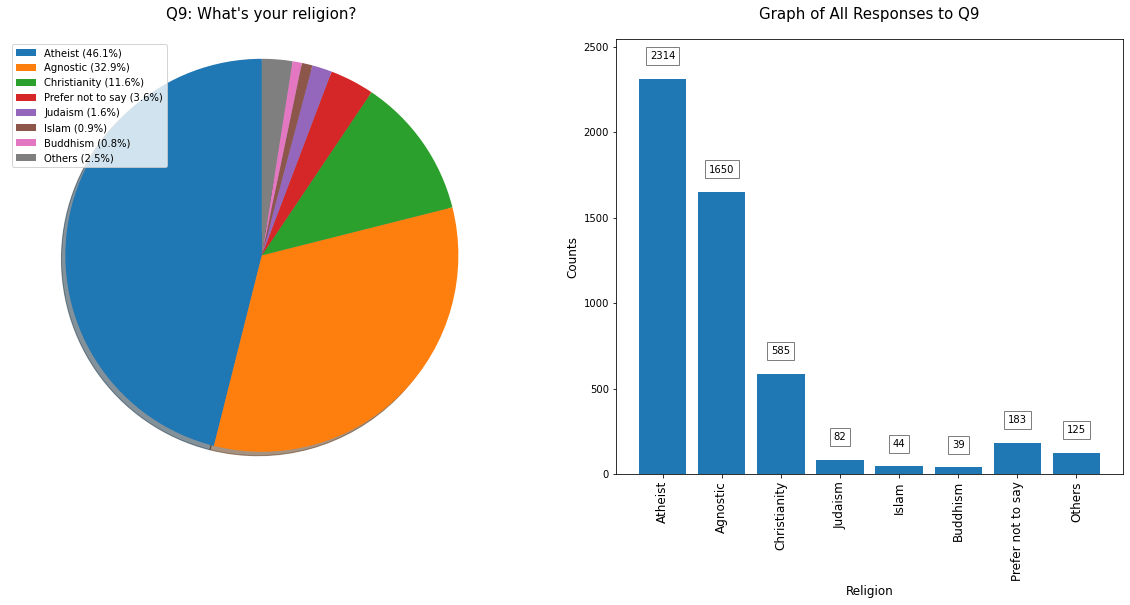

In [1434]:
plotpiengraph(QNUM=9,df = df.iloc[:,[9]], X_label='Religion', THRES = 7, sort_by = [0,1,2,4,5,6,3,7], graphothers = True)

46.1% are atheist, and 32.9% are agnostic, making up a huge non-Godfearing 79% majority of responders, which is slightly more than the percentage of Nitrogen in air. Following that, 11.6% are Christians, which follow the religious profile of the general North Atlantic population of viewers, and Judaism (1.6%), Islam (0.9%), Buddhism (0.8%) and Hinduism (0.3%) are the remaining minority of religions with more than 10 responses each. 

Special mentions which have 1 response apiece, and aren't real religions:
- Jedi
- Cult of Egg
- Eggnostic
- Non-binary
- NLism
- Dudeism
- Not religous but not not religious
- Veganism
- Church of NL

## Egg Facts

### How long ago did you begin watching?

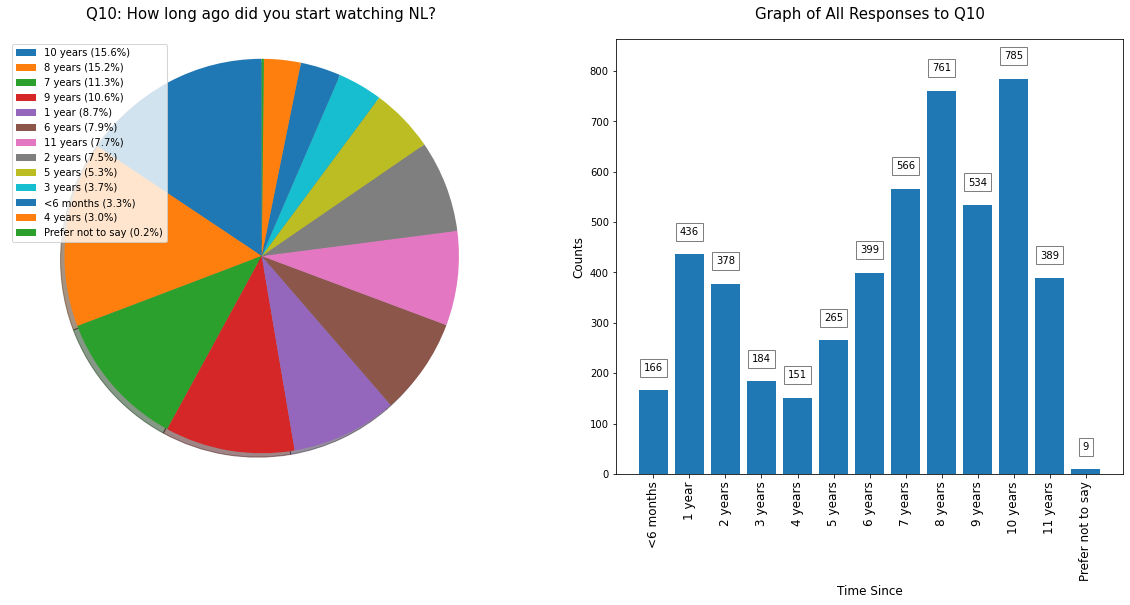

In [717]:
plotpiengraph(QNUM=10,df = df.iloc[:,[10]], X_label='Time Since', sort_by = [10,4,7,9,11,8,5,2,1,3,0,6,12])

A curious bimodal distribution can be seen in the graph, where loyal viewers who've stayed on for 7-11 years make up 60% of the responders, and another spike belongs to those who've joined 1-2 years ago, which make up 16% of the population. This bump in the recent 2 years might be explained by the release of Repentance in Mar 2021, or perhaps a favouring of Egg in the YouTube algorithm, but nonetheless, kudos to all the loyal viewers out there who continue to support NL over the years. Additionally, perhaps someone who's more in the know could explain why the two largest segments of 10-years and 8-years, each making up roughly 15%, has a 1-year drop in between at 9 years (10.6%), which makes this technically a trimodal distribution.

### How long do you watch NL in a week?

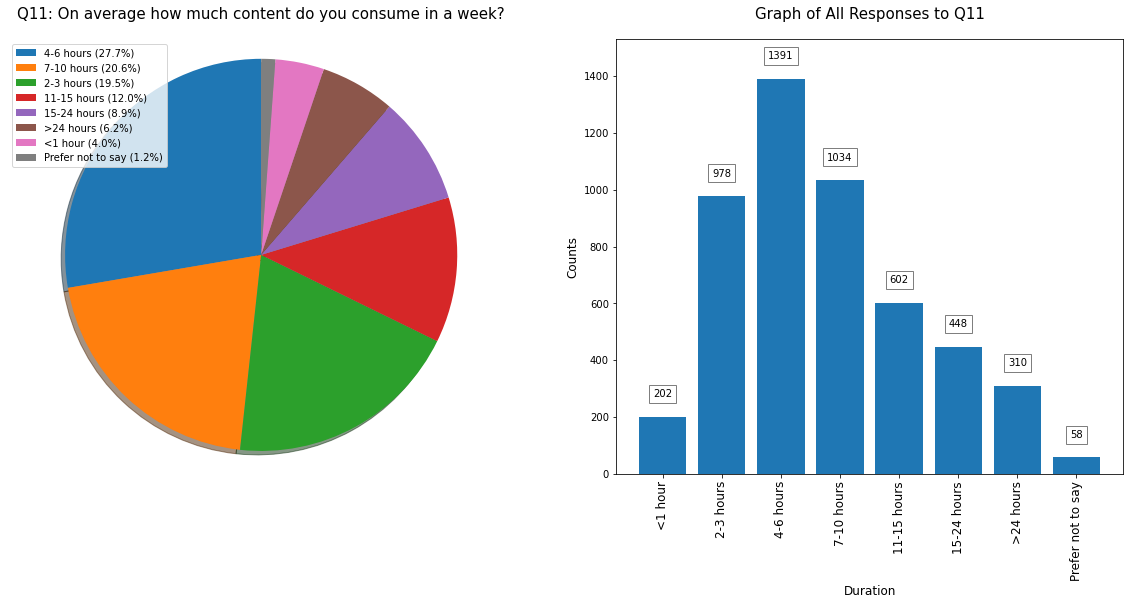

In [718]:
plotpiengraph(QNUM=11,df = df.iloc[:,[11]], X_label='Duration', sort_by = [6,2,0,1,3,4,5,7])

The mode of this distribution occurred at 4-6h per week, accounting for 28% of the responders, which corresponds to roughly an hour a day. Roughly 20% of responders watch either 7-10h per week, or 2-3h per week, while on the extreme end, 6.2% watch >24h per week, which represent the most loyal of viewers who catch every stream or use it as a 5h long sleeping aid.

Additionally, I couldn't help but point out that the entire set of time ranges in this graph do not cover all possible times, which was a little funny. In particular, responders who watch 1-2h, 3-4h, or 6-7h a week would be stumped and have no choice but to round up or down to their favourite time range.

### How did you find NL?

In [731]:
reasonsdf = df.iloc[:,[12]]
reasonsdf["How did you find NL?"] = reasonsdf["How did you find NL?"].apply(cleanstr)
reasonsdf["length"] = reasonsdf["How did you find NL?"].apply(lambda x: len(x))

In [1600]:
# Length of reason

# print(sorted(reasonsdf['length'].unique()))
longdict = dict()
for m in range(len(reasonsdf)):
    key = reasonsdf.iloc[m,1]
    if key not in longdict:
        longdict[key] = {reasonsdf.iloc[m,0]}
    else:
        longdict[key].add(reasonsdf.iloc[m,0])
for k in sorted(longdict.keys()):
    print(f"{k}: {longdict[k]}")

2: {'N+', 'TB'}
3: {'Lsf', 'CK2', 'SAP', 'FTL', 'LSF', 'Ck2', 'SMB', 'EU4', 'Eu4'}
4: {'XCOM', 'Xcom', 'DAYZ', 'CKII', 'EUIV', 'Levy', 'Isek', 'Sips'}
5: {'Chess'}
6: {'Tumblr', 'Arumba', 'Facade', 'Twitch', 'Dota 2', 'Apollo', 'Ludwig', 'Mathas', 'SAP :)', 'Reddit', 'Vvvvvv', 'Atrioc', 'TikTok'}
7: {'Twitter', 'Xcom ew', 'Meatboy', 'EU4/CK2', 'Collabs', 'Gungeon', 'Husband'}
8: {'Terraria', 'Spelunky', 'Sinvicta', 'Siblings', 'Schooled', 'Factorio'}
9: {'Civil War', 'Facade!!!', 'New Vegas', 'Crossword', 'GeoGuessr', 'Machinima', 'Geoguessr', 'PogChamps', 'Pogchamps', 'Machinama'}
10: {'Dark Souls', 'My husband', 'My partner', 'Dark souls', 'Overcooked', 'Blood Bowl', 'Spelunky 2'}
11: {'EU4 I think', 'PUBG Videos', 'TGS Podcast', 'Meat Boy B)', 'GothamChess', 'From Ludwig', 'Through dan', 'Clip on LSF', 'Levy Collab', 'Sips colabs', 'TGS podcast', 'Korean vlog', 'SAP & Chess', 'Pre Isek YT'}
12: {'Wlvsatmydoor', 'Dark Souls 1', 'TotalBisbuit', 'Dark souls 1', 'Rouge legacy', 'Day Z s

In [1601]:
# Pre-cleaning
for a, b in zip(reasonsdf["How did you find NL?"].value_counts().index,reasonsdf.value_counts().values):
    print(f'{a},\t {b}')

Isek,	 2534
YouTube recommendations,	 1170
Friend recommendation,	 435
Twitch,	 267
Super Meat Boy,	 24
Poison Mushroom,	 16
Ludwig,	 12
Reddit,	 12
Prefer not to say,	 11
Poison mushroom,	 10
Spelunky,	 9
Co-optional podcast,	 9
Totalbiscuit,	 8
Dark Souls,	 8
Don't remember,	 8
SAP,	 8
Machinima,	 8
Sips,	 5
LSF,	 5
Super meat boy,	 5
Poison Mushroom on Machinima,	 5
Dark souls 1,	 4
EU4,	 4
Dark souls,	 4
Xcom,	 4
Total biscuit,	 4
Eu4,	 3
TikTok,	 3
TotalBiscuit,	 3
XCOM,	 3
Mathas,	 3
FTL,	 3
Schooled,	 2
Sinvicta,	 2
Super Auto Pets,	 2
Arumba,	 2
Terraria,	 2
Co-optional Podcast,	 2
Cooptional podcast,	 2
Spelunky 2,	 2
Crendor's Blood Bowl League,	 2
The Co-Optional Podcast,	 2
Rogue Legacy,	 2
Total Biscuit,	 2
Don’t remember,	 2
TB,	 2
Co-Optional Podcast,	 2
The Co-optional podcast,	 2
Scribblenauts,	 2
Gungeon,	 2
Levy,	 2
Twitter,	 2
Recommended by another youtuber,	 2
Dark Souls LP,	 2
Geoguessr,	 2
Cooptional Podcast,	 2
Slay the spire,	 1
Apollo,	 1
Machinima Respawn,	 

In [1083]:
# Search function
def listreasons(keywords, verbose = False, thedf = reasonsdf):
    totcount = 0
    totreasons = []
    totview = []
    for idx, m in (enumerate(thedf.value_counts().index)):
        reason = m[0].strip().lower()
        cnt = thedf.value_counts().values[idx]
        if any([keyw in reason for keyw in keywords]):
            totcount+=cnt
            totreasons.append(m[0])
            totview.append((m[0],cnt))
    if verbose:
        print(totview)
    return totreasons, totcount

In [1264]:
## Games
# Isaac
isaacs, isaaccnt = listreasons(['isek','isaac', ' boi '])
# Super Auto Pets
saps, sapcnt = listreasons(['sap','auto','pet'])
# Poison Mushroom/Machinima
mushs, mushcnt = listreasons(['poison','mush','mach'])
# Super meat boy
smbs, smbcnt = listreasons(['meat','smb'])
# Chess
chess, chesscnt = listreasons(['chess', 'levy'])
# Dark Souls
darksouls,darksoulscnt = listreasons(['dark','soul'])
# Spelunky
spelunk, spelunkcnt = listreasons(['spelunky'])
# XCOM
xcom, xcomcnt = listreasons(['xcom'])
# Slay the Spire
spire, spirecnt = listreasons(["spire"])
# FTL
ftl, ftlcnt = listreasons(["ftl"])
# Crusader Kings 2
cruking, crukingcnt = listreasons(["kings"])
# Prison Architect
prison, prisoncnt = listreasons(["prison"])
# Scribblenauts
scrib, scribcnt = listreasons(["naut"])

## Other streamers/YTubers
# NLSS crew
nlsss, nlsscnt = listreasons(['apollo','baer', 'justin', 'patrol', 'nlss', 'dan', 'sinvicta', 'rock lee', 'rocklee', 'nick', 'cobalt', 'crendor', 'door'])
# Arumba / Quill / Eu4 / CK2
arumbas, arumbascnt = listreasons(['arumba','quill','eu4','ck2','euiv','ckii','math'])
# Totalbiscuit/Co-optional podcast
biscuits, biscuitscnt = listreasons(['biscuit', 'total', 'option'])
# Sips
sipss, sipsscnt = listreasons(['sips'])
# Ludwig
ludwigs, ludwigscnt = listreasons(['ludwig'])
# Mizkif schooled
miz, mizcnt = listreasons(['school', 'miz'])
# TB 
TBs, TBcnt = (['TB', 'TBs gaming podcast', "TB's podcast", 'Blood bowl with TB', 'Blood Bowl'], 6)

## Misc
# Youtube
yts, ytcnt = listreasons(['youtube collab', 'youtube recommendations', 'youtuber', 'ytber'])
# Friend/Family Recommendation
frrec, frrecnt = listreasons(['sibling','family',"friend recommendation", 'my partner', 'husband', 'my friend', 'my boyfriend', 'my brothers','through friend'])
# Twitch
twitch, twitchcnt = listreasons(['twitch'])
# Podcasts
podcastt, podcastcnt = listreasons(['podcast'])
# reddit
redds, reddcnt = listreasons(['reddit'])
# Don't remember
dntrmbrs, dntrmbrcnt = listreasons(['remember',"not know", "not sure", "dont recall"])
# Prefer not to say
notsay, notsaycnt = listreasons(['say'])
# LiveStreamFail
lsf, lsfcnt = listreasons(["lsf", "livestream", "fail"])
# Let's look at
looky, lookcnt = listreasons(['look at'])

In [1265]:
somereasons = set(np.concatenate([isaacs, mushs, smbs, chess, darksouls, spelunk, xcom, nlsss, arumbas, mathas, quills, biscuits, sipss, ludwigs, miz, yts, twitch, podcastt, redds, dntrmbrs, notsay, frrec, saps, lsf, spire, ftl, cruking, prison, scrib, TBs, looky ]))

In [1602]:
# Leftover reasons too lazy to filter
currg = reasonsdf[~reasonsdf['How did you find NL?'].isin(somereasons)]
list(currg["How did you find NL?"].value_counts().index)

['TikTok',
 'Terraria',
 'Twitter',
 'Geoguessr',
 'Rogue Legacy',
 'Gungeon',
 'The Room The Game playthrough with Malf',
 'Fall Guys release',
 "Hasan's AOC stream",
 'Online recommendation',
 "Dungeons of dredmor let's play",
 'Facade',
 'While looking for Dungeons of Dredmor videos',
 'Luck Be A Landlord',
 'Jim Sterling mentioned in a vid',
 'Jagmeet Singh/AOC game',
 'I believe it was Wanderbots or Chippy who recommended him to me',
 'Overcooked',
 "Mega Man Let's Play",
 'Skulls of the shogun',
 'PogChamps',
 'Into the Breach',
 "Slasher's Keep",
 'Hasanabi said he was funny so I looked',
 "I was the Editor-in-Chief for a gaming website I co-founded and started a series of YouTube Gaming channel recommendations for channels with >50k subs, 50-100k subs, and 100-250k subs. I checked a sub leaderboard for relevant channels, found Northernlion's channel, and enjoyed it well enough to recommend: https://gamesided.com/2013/08/06/youtube-gaming-community-clicks-july-2013/amp/4/",
 'Ro

In [1593]:
currg['How did you find NL?'].apply(str.lower).value_counts();

In [1268]:
names = ['The Binding of Isaac', 'Super Auto Pets', 'Poison Mushroom/Machinima', 'Super Meat Boy', 'Chess','Dark Souls', 'Spelunky', 'Xcom', 'Slay The Spire', 'FTL', 'Crusader Kings', 'Prison Architect', 'Scribblenauts', 'NLSS Crew', 'Arumba/Quill/Mathas/EU4/CK2', 'Totalbiscuit/Cooptional Podcast', 'Sips', 'Ludwig', 'Schooled_Mizkif', 'TB', 'Youtube Recs/Collabs', 'Friends/Family', 'Twitch', 'Podcasts','Reddit', 'Dont remember', 'Prefer not to say', 'LiveStreamFails','Lets look at']
counts = [isaaccnt, sapcnt, mushcnt, smbcnt, chesscnt, darksoulscnt, spelunkcnt, xcomcnt, spirecnt, ftlcnt, crukingcnt, prisoncnt, scribcnt, nlsscnt, arumbascnt, biscuitscnt, sipsscnt, ludwigscnt, mizcnt, TBcnt, ytcnt, frrecnt, twitchcnt, podcastcnt, reddcnt, dntrmbrcnt, notsaycnt, lsfcnt, lookcnt ]
recleanedreasons = list(np.concatenate([[a for i in range(b)] for a,b in zip(names, counts)]))+list(currg['How did you find NL?'])
recleanedreasons = pd.DataFrame(recleanedreasons)
recleanedreasons.columns = ["How did you find NL?"]

In [1603]:
for a, b in zip(recleanedreasons.value_counts().index,recleanedreasons.value_counts().values):
    print(f'{a},\t {b}')

('The Binding of Isaac',),	 2559
('Youtube Recs/Collabs',),	 1194
('Friends/Family',),	 447
('Twitch',),	 271
('Arumbas/Quill/Mathas/EU4/CK2',),	 57
('Totalbiscuit/Cooptional Podcast',),	 56
('Poison Mushroom/Machinima',),	 55
('Super Meat Boy',),	 50
('Podcasts',),	 43
('NLSS Crew',),	 39
('Dark Souls',),	 38
('Dont remember',),	 27
('Ludwig',),	 21
('Reddit',),	 20
('Super Auto Pets',),	 17
('Spelunky',),	 14
('Chess',),	 13
('Xcom',),	 11
('Prefer not to say',),	 11
('LiveStreamFails',),	 11
('Sips',),	 9
('Crusader Kings',),	 7
('Lets look at',),	 6
('TB',),	 6
('FTL',),	 6
('Schooled_Mizkif',),	 5
('Scribblenauts',),	 5
('Slay The Spire',),	 5
('Prison Architect',),	 5
('TikTok',),	 3
('Gungeon',),	 2
('Geoguessr',),	 2
('Terraria',),	 2
('Rogue Legacy',),	 2
('Twitter',),	 2
('Pubg highlights',),	 1
('Pretty sure through other content creators/colab',),	 1
('Pogchamps',),	 1
('Rock Paper Shotgun',),	 1
('PogChamps',),	 1
('PauseUnPause spoke about him in a video years ago',),	 1


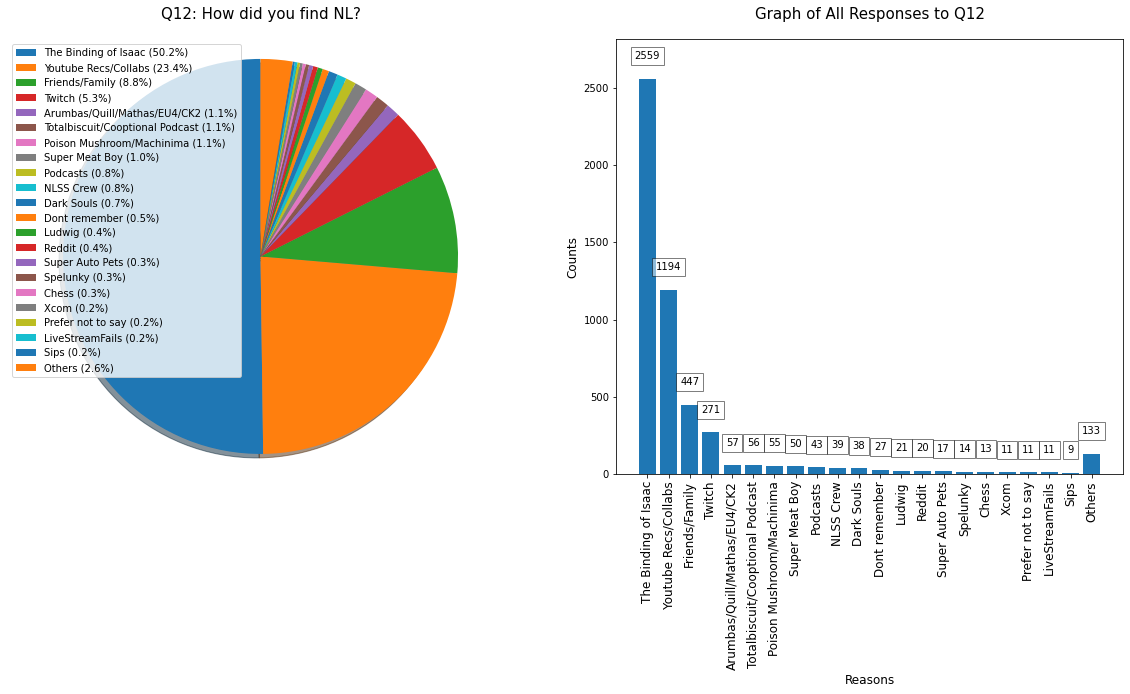

In [1272]:
plotpiengraph(QNUM=12,df = recleanedreasons, THRES = 21, X_label='Reasons')

The data cleaning I performed for this question sucked the life out of me, as the original question had a total of 424 unique responses, thanks to its open-ended nature where many users listed (using natural language) the myriad reasons that led them to discovering NL. Due to the current technical difficulties of named entity recognition in natural language processing, my cleaning involved literal manual cleaning by identifying repeated words and games which arose frequently in the multitude of responses, and pooling entries which contained similar keywords into the same category. For example, the "Isaac" category would include entries containing any of the keywords "isaac", "isek" (*which was the original option*), "boi" whereas the "Friends/Family" category would include any of the keywords ('sibling','family',"friend recommendation"(*the original option*), 'my partner', 'husband', 'my friend', 'my boyfriend', 'my brothers', 'through friend'). I performed such manual cleaning till I grew immensely tired of the process, which was why I set the threshold of significance at 5 entries, leaving a total of 87 entries (77 unique case-insensitive entries, which had frequencies less than 4) ungrouped. 

Another thing to note is that since some explanations contained more than one reason, these user-submitted explanations were counted once for each of the different reasons. For example, the Cooptional podcast followers are counted again for the "Podcasts" segment. Thus the total number of responses is larger and these results will differ slightly from the uncleaned pie chart that's already published by r/RiotLightbulb, where Isek takes up 50.4% and not 50.2%.

With that said, here are the results:

To no one's surprise, Isaac reigns supreme as the great agglutinator of NL fans, although what's surprising is that it makes up almost exactly half (50.2%) of all entries. The next 23% of all responses come from YouTube Recommendations/YouTube collaborations, which makes sense since as we will see in the following graph almost 2/3 of all responses watch NL primarily on YouTube. Following that, Friends/Family make up 8.7%, and Twitch 5.3%. From here on, I've listed the answers which have more than or equal to 5 responses each. For some categories, due to most of the explanations including more than one keyword, I've elected to group the reasons together. For example, I noticed that explanations featuring Arumba also mentioned Quill, Mathas, CK2 and EU IV, so I've lumped them all up together. Next, I noticed that quite a few responses involve several other members on the NLSS crew, and I've grouped them all together to save on effort. 

As such, the top 20 groups of responses are shown on the graph, with Poison Mushroom on Machinima, Totalbiscuit & the Co-optional Podcast, and the group of Arumba et al all making up 1.1% each, and Super Meat Boy coming in close at 1.0%. Other honourable mentions are NLSS crew (0.8%),  Podcasts (in general) (0.8%) and Dark Souls (0.7%). Recent additions to the NL docket such as Chess (0.3%) and Super Auto Pets (0.3%) are notable too, falling behind Ludwig and Reddit at 0.4% each.

Additionally, I also ranked the open-ended responses based on their lengths, and the winner of the most long-winded comment contest goes to this gaming website advertisement which clocks in at 388 characters long: "I was the Editor-in-Chief for a gaming website I co-founded and started a series of YouTube Gaming channel recommendations for channels with >50k subs, 50-100k subs, and 100-250k subs. I checked a sub leaderboard for relevant channels, found Northernlion's channel, and enjoyed it well enough to recommend: https://gamesided.com/2013/08/06/youtube-gaming-community-clicks-july-2013/amp/4/". To him, I congratulate him on reaching the niche target audience of voluntary data analysts on a census posted on reddit.

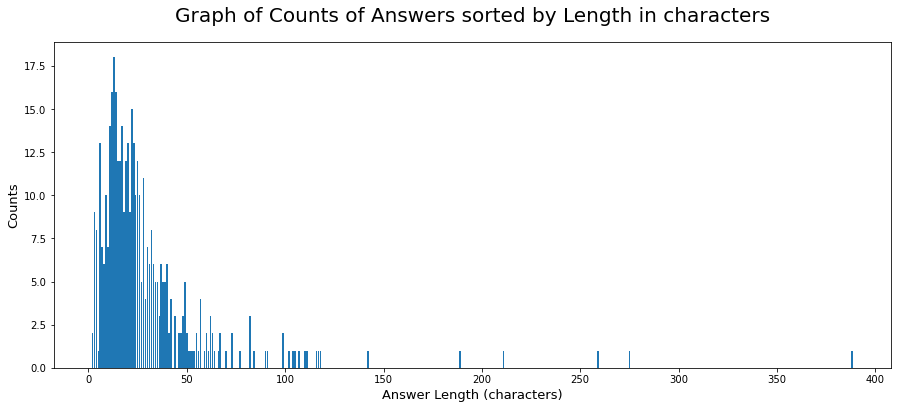

In [1287]:
anslen = longdict.keys()
numsans = [len(m) for m in longdict.values()]

fig, ax = plt.subplots(figsize=(15,6)) 
plt.bar(x = anslen, height = numsans)

ax.set_title("Graph of Counts of Answers sorted by Length in characters",fontsize = 20, pad = 20);
ax.set_xlabel('Answer Length (characters)',fontsize = 13)
ax.set_ylabel('Counts',fontsize = 13);

plt.show()

In [1323]:
print(f"For all answers, Mean: {np.mean(reasonsdf['length']):.2f} chars, Mode: {reasonsdf['length'].value_counts().index[0]}-letter answers appearing {reasonsdf['length'].value_counts().values[0]} times, Median: {sorted(reasonsdf['length'])[len(reasonsdf)//2]} chars")
alllens = np.concatenate([[m]*len(longdict[m]) for m in longdict.keys()])
modelens = sorted([(len(longdict[a]),a) for a in longdict.keys()], key = lambda x: -x[0])[0]
print(f"For unique answers, Mean: {np.mean(alllens):.2f} chars, Mode: {modelens[1]}-letter answers appearing {modelens[0]} times, Median: {sorted(alllens)[len(alllens)//2]} chars.")

For all answers, Mean: 12.48 chars, Mode: 4-letter answers appearing 2551 times, Median: 4 chars
For unique answers, Mean: 30.02 chars, Mode: 13-letter answers appearing 18 times, Median: 22 chars.


Kudos to the 6 people whose answers cannot fit in a tweet. The median and mode answers are both 4 letters long (no prizes for guessing what answer it is), and the mean answer is 12.5 letters long. For unique answers, the mode are 13-letter answers appearing 18 times, with the mean at 30 letters long and the median answer being 22 letters long.

Do with this information as you will. (Which is nothing, since this is pretty useless information).

### Where do you watch NL?

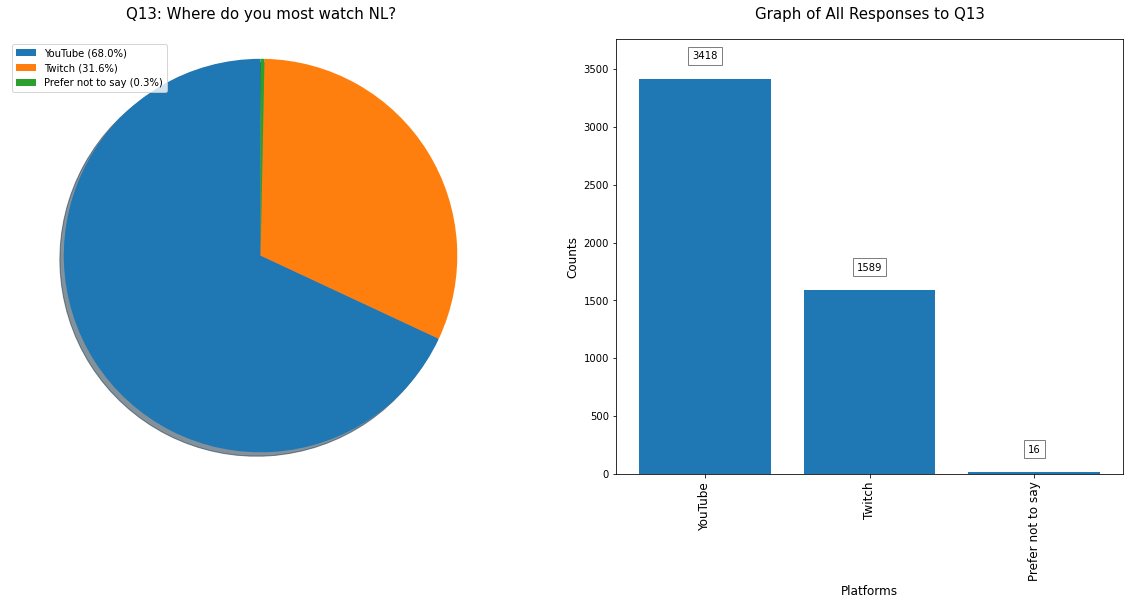

In [1326]:
plotpiengraph(QNUM=13,df = df.iloc[:,[13]], X_label='Platforms')

This pie chart is pretty self explanatory, 68% of viewers watch NL on YouTube primarily, while 31.6% watch mainly on twitch, with 0.3% very self-conscious of their viewing platform preferences.

### Nicknames for the Egg

In [1604]:
# Pre-cleaning
for a, b in zip(df.iloc[:,14].value_counts().index,df.iloc[:,14].value_counts().values):
    print(f'{a},\t {b}')

NL,	 2692
Northernlion.,	 881
Ryab,	 410
Egg,	 340
Enele,	 218
Ryan,	 195
Northern,	 110
Ryan Gary,	 20
Nor Thernlion,	 14
Letourneau,	 9
Mark,	 7
Bald,	 4
All of the above,	 4
Bald man,	 3
Enelle,	 3
Northernloin,	 2
Nor thernlion,	 2
Gary,	 2
Scum,	 2
North Million,	 2
Mr. Lion,	 2
North million,	 2
Tonto, slayer of dragons,	 1
Northern Millionshares,	 1
My streamer guy ,	 1
Eggsy,	 1
Nor The Lion,	 1
El Huevo,	 1
bald man,	 1
Ey Everybody!!!!!,	 1
Bald guy,	 1
All of the above.,	 1
Dragonslayer Doppelgänger,	 1
daddy,	 1
Esports superstar Northern,	 1
E-Sports Legend "Northern",	 1
Egg daddy,	 1
Ryan Letournaeu,	 1
Any and all of the above,	 1
Nor the ER lion,	 1
“What the fuck is a Ryab??”,	 1
HoBorvat,	 1
Bald guy with baby (ny gf doesnt know who im talking bout otherwise),	 1
Slab daddy,	 1
Northernmillion,	 1
Baldo,	 1
🥚,	 1
ayy errbody,	 1
Legendary E-Sports Champions of Fire Champion,	 1
Northern Lino (pronounced "Leeno"),	 1
NRHR OTEN,	 1
yes,	 1
all of the above added with d

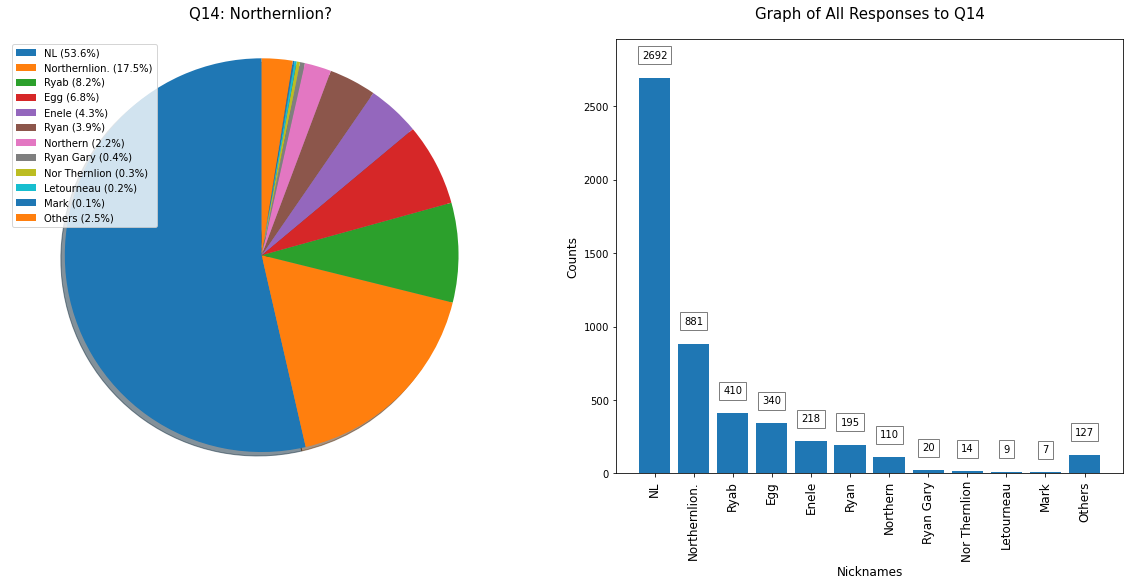

In [1329]:
plotpiengraph(QNUM=14,df = df.iloc[:,[14]], X_label='Nicknames', THRES = 11)

Slightly above half (53.6%) of all viewers refer to our beloved egg as NL, followed by the respectful unabbreviated version (17.5%), Ryab (8.2%) coming in more than twice of Ryan (3.9%), Egg at 6.8%, Enele at 4.3%, and Northern at 2.2%, not to be confused with Kanye's daughter. I've arbitrarily set the threshold of the graph to display names with more than 7 responses so that "Mark" can appear, which I've always found as a pretty funny running chess joke.

For those with a lot of time on their hands and wish to read through the whole list of nicknames so that you can address NL by a different nickname every week for the next two years, here are the other 113 responses. Bracketed is the number of counts of each response.
- Ryan Gary (20)
- Nor Thernlion (14)
- Letourneau (9)
- Bald, All of the above (4)
- Bald man, Enelle (3)
- Northernloin, Nor thernlion, Gary, Scum, North Million, Mr. Lion, North million (2)

At one response each,
- 'Tonto, slayer of dragons', 'Northern Millionshares', 'My streamer guy ', 'Eggsy', 'Nor The Lion', 'El Huevo', 'bald man', 'Ey Everybody!!!!!', 'Bald guy', 'All of the above.', 'Dragonslayer Doppelgänger', 'daddy', 'Esports superstar Northern', 'E-Sports Legend "Northern"', 'Egg daddy', 'Ryan Letournaeu', 'Any and all of the above', 'Nor the ER lion', '“What the fuck is a Ryab??”', 'HoBorvat', 'Bald guy with baby (ny gf doesnt know who im talking bout otherwise)', 'Slab daddy', 'Northernmillion', 'Baldo', '🥚', 'ayy errbody', 'Legendary E-Sports Champions of Fire Champion', 'Northern Lino (pronounced "Leeno")', 'NRHR OTEN', 'yes', 'all of the above added with daddy', 'NL, Northernlion, Ryan, Ryan, and egg interchangeably. ', 'Scumbag', 'Northy', 'scum', 'What the fuck is a Ryab', 'Esports professional', 'Gf calls him Eggman', "What the fuck's a ryab?", 'What the hell is a ryab', 'Bald jerk', 'Papa pig', 'EggDad', 'The Punished Egg', 'He’s Bald?!?', "Mostly NL (I pronounce it 'null') but I do also like using Egg Father ", 'e sports legend northern', 'Esports Superstar Ryan "Northern Millionshares" Gary Letourneau ', 'NRHR OTEN, or NL', 'my streamer', 'Northmillion', 'Nothernloin', 'Ryan Gary Letourneau', 'Egglord', 'My girlfriend calls him Ryan', 'All', 'That guy that sharted', 'JsmithOTI', 'NorthMillion', 'Father', 'NR(NorthernRyan)', 'nl', 'Northerlion to my GF, NL to my friend who watches ', 'Tom', 'Our Egg Father', 'Nor Thernlion, a.k.a. "Puddin\' Trouble Alvarado"', 'Egg Man', 'Ryan teacher', 'nor thernlion', 'Nor Thernlion (West of Loathing name)', 'Lionman', 'Northelion', 'Egg Drill', 'Esports superstar northern', "Word to ya mother it's your boy N to the orthernlion Northernlion comin at you from ... largely the west actually if you wanna get technical", 'Bald streamer man', 0, 'Ryan Lion', 'thornforge', 'All. Of the above ', 'Esports Legend Northorn ', 'old NL', "Ryan 'gary'", 'Brian', 'Nor The nLion', 'Zoomer Boomer', 'baldie', 'Thornforge', 'Rihanna', 'the fuck is a ryab', 'Ryan Gary Anthony Michael Letourneau', 'E-sports legend Northern', 'JOSH', 'Egg Daddy', 'Pig Dad', 'My son calls him "Nonolala"', 'Eggfather', 'depends', 'Even split between Ryab/NL'


In [1596]:
# print(list(df.iloc[:,14].value_counts().index[22:]))

### Likelihood of Continued Patronage

In [1446]:
# Replacement of NaNs

cleaneddf = df.iloc[:,[15]]
cleaneddf[cleaneddf.columns[0]] = cleaneddf[cleaneddf.columns[0]].replace(np.nan, "Did not reply")
cleaneddf[cleaneddf.columns[0]] = cleaneddf[cleaneddf.columns[0]].apply(str)

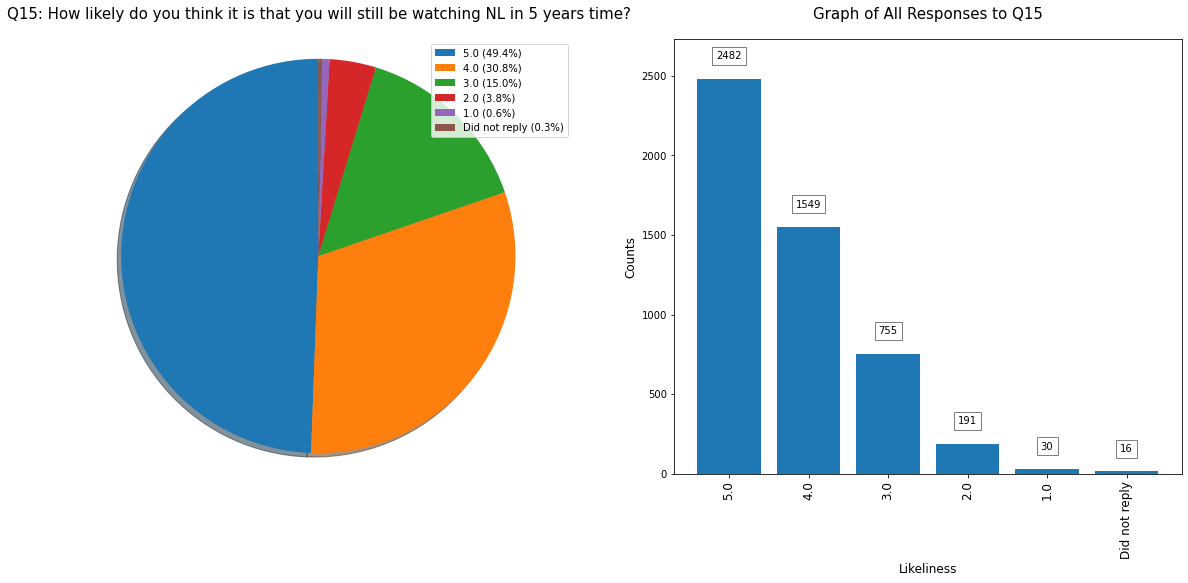

In [1459]:
plotpiengraph(QNUM=15,df = cleaneddf, X_label='Likeliness')

In [1452]:
kk = sorted(df.iloc[:,15].dropna())
print(f"Mean: {np.mean(kk):.2f}, Mode: {df.iloc[:,15].value_counts().index[0]}, Median: {kk[len(kk)//2]}")

Mean: 4.25, Mode: 5.0, Median: 4.0


Heartening to see, almost half of all viewers will definitely continue watching NL in 5 years time, with 31% rating as 4.0 and another 15% rating themselves at 3.0, which constitutes 96% of all surveyed. To the other 4.4% who chose 2.0 and 1.0, we wish you all the best on your endeavours in 5 years time. 

### Shiny Dome?

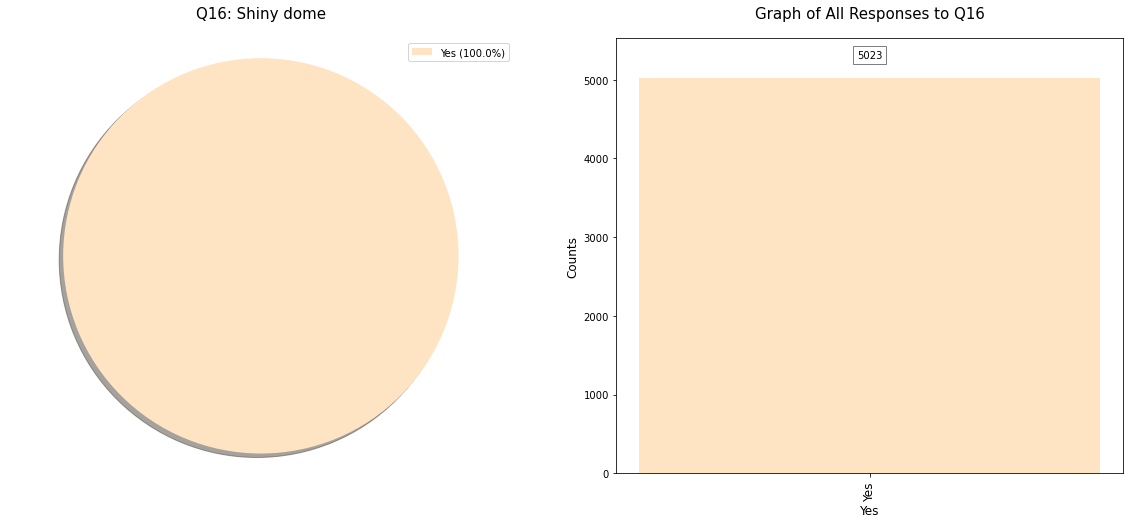

In [1458]:
plotpiengraph(QNUM=16,df = df.iloc[:,[16]], X_label='Yes', color = ["bisque"])

Yes.

### Miscellaneous other Explorations

#### Level of basicness

In [1516]:
df2 = df.copy()

In [1517]:
# Removal of NaNs
df2.iloc[:,8] = df.iloc[:,8].replace(np.nan,'Did not say')
df2.iloc[:,9] = df.iloc[:,9].replace(np.nan,'Prefer not to say')
df2.iloc[:,15] = df.iloc[:,15].replace(np.nan,'Did not say')

Here we have the questions with the number of unique answers per question. The aim of cleaning here is to aggregate the minority responses into a catch-all of Others, so that we can calculate the probability of each response for each question. Next, the product of these probabilities would tell us how unique this responder is compared to the others.

In [1518]:
for m in range(1,len(df2.columns)):
    print(m, df2.columns[m], len(df2.iloc[:,m].value_counts()))

1 How old are you? 7
2 Where are you from? 7
3 What's your gender? 22
4 What's your sexuality? 36
5 Are you in a relationship? 5
6 Do you have any children? 7
7 In what area do you work at? 15
8 Where do you align yourself politically  11
9 What's your religion? 86
10 How long ago did you start watching NL? 13
11 On average how much content do you consume in a week? 8
12 How did you find NL? 456
13 Where do you most watch NL? 3
14 Northernlion? 121
15 How likely do you think it is that you will still be watching NL in 5 years time? 6
16 Shiny dome 1


In [1519]:
# grouping minority responses into catch-all

indexes = [3, 4, 9, 12, 14]
thresholds = [6, 7, 8, 4, 7]
for indx , thres in zip(indexes, thresholds):
    avails = set(df2.iloc[:,indx].value_counts().index[:thres])
    df2.iloc[:,indx] = df2.iloc[:,indx].apply(lambda x: x if x in avails else "Others")

After the transformation, questions such as Q12 and Q14 are reduced to a manageable number of categories.

In [1508]:
for m in range(1,len(df2.columns)):
    print(m, df2.columns[m], len(df2.iloc[:,m].value_counts()))

1 How old are you? 7
2 Where are you from? 7
3 What's your gender? 7
4 What's your sexuality? 8
5 Are you in a relationship? 5
6 Do you have any children? 7
7 In what area do you work at? 15
8 Where do you align yourself politically  11
9 What's your religion? 9
10 How long ago did you start watching NL? 13
11 On average how much content do you consume in a week? 8
12 How did you find NL? 5
13 Where do you most watch NL? 3
14 Northernlion? 8
15 How likely do you think it is that you will still be watching NL in 5 years time? 6
16 Shiny dome 1


In [1520]:
for m in range(1,len(df.columns)):
    stats = df2.iloc[:,m].value_counts()
    logprobs = [round( np.log(len(df2)) - np.log(m), 4) for m in stats.values]
#     print(m, df2.columns[m], len(df2.iloc[:,m].value_counts()), logprobs)
    mapdict = dict(zip(stats.index, logprobs))
    df2[f"Q{m}_probs"] = df2.iloc[:,m].apply(lambda x: mapdict[x])

In [1523]:
df2['Uniqueness'] = df2.iloc[:,17:33].sum(axis = 1)

_Top 10 most basic responders_

In [1558]:
df2 = df2.sort_values(by = "Uniqueness")
cols = list(range(1,17)) + [33]
df2.iloc[:10,cols]

,How old are you?,Where are you from?,What's your gender?,What's your sexuality?,Are you in a relationship?,Do you have any children?,In what area do you work at?,Where do you align yourself politically,What's your religion?,How long ago did you start watching NL?,On average how much content do you consume in a week?,How did you find NL?,Where do you most watch NL?,Northernlion?,How likely do you think it is that you will still be watching NL in 5 years time?,Shiny dome,Uniqueness
3388,15-25 years old,North America,Male,Straight,"No, but I have before","No, but I want to have",Science and technology,3.0,Atheist,10 years,7-10 hours,Isek,YouTube,NL,5.0,Yes,12.6788
1268,15-25 years old,North America,Male,Straight,"No, but I have before","No, and I don't want to have",Science and technology,3.0,Atheist,8 years,2-3 hours,Isek,YouTube,NL,5.0,Yes,12.7751
2069,15-25 years old,North America,Male,Straight,"Yes, but it's not my first one","No, but I want to have",Student,1.0,Atheist,8 years,4-6 hours,Isek,YouTube,NL,5.0,Yes,12.8589
3408,15-25 years old,North America,Male,Straight,"No, but I have before","No, but I want to have",Student,3.0,Agnostic,8 years,4-6 hours,Isek,YouTube,NL,5.0,Yes,12.9339
149,15-25 years old,North America,Male,Straight,"Yes, but it's not my first one","No, and I don't want to have",Science and technology,2.0,Atheist,7 years,4-6 hours,Isek,YouTube,NL,5.0,Yes,13.0229
1704,26-35 years old,North America,Male,Straight,"Yes, but it's not my first one","No, and I don't want to have",Science and technology,3.0,Atheist,10 years,7-10 hours,Isek,YouTube,NL,5.0,Yes,13.0586
4679,15-25 years old,North America,Male,Straight,"Yes, but it's not my first one","No, but I want to have",Student,3.0,Atheist,8 years,4-6 hours,Isek,YouTube,NL,4.0,Yes,13.0616
1321,15-25 years old,North America,Male,Straight,"No, but I have before","No, but I want to have",Science and technology,3.0,Agnostic,9 years,4-6 hours,Isek,YouTube,NL,5.0,Yes,13.1058
1834,26-35 years old,North America,Male,Straight,"Yes, but it's not my first one","No, but I want to have",Science and technology,3.0,Atheist,9 years,4-6 hours,Isek,YouTube,NL,5.0,Yes,13.1377
3151,15-25 years old,North America,Male,Straight,"No, but I have before","No, but I want to have",Science and technology,3.0,Atheist,10 years,4-6 hours,Isek,Twitch,NL,5.0,Yes,13.1481


Congratulations to the ten individuals above who qualify as the most representative (basic) NL viewer! The NL starter pack memes will hereby be forever associated with your traits.

In [1563]:
for m in range(1, len(df.columns)):
    QN = df.columns[m]
    ANS = df2.iloc[:,m].value_counts().index[0]
    print(f"Q{m} {QN}: {' '*(90-len(QN)-len(str(m)))} {ANS}")

Q1 How old are you?:                                                                           15-25 years old
Q2 Where are you from?:                                                                        North America
Q3 What's your gender?:                                                                        Male
Q4 What's your sexuality?:                                                                     Straight
Q5 Are you in a relationship?:                                                                 Yes, but it's not my first one
Q6 Do you have any children?:                                                                  No, but I want to have
Q7 In what area do you work at?:                                                               Science and technology
Q8 Where do you align yourself politically :                                                   3.0
Q9 What's your religion?:                                                                      Atheist
Q10 How long

For reference, these are the modes of each answer for the 16 questions, representing the pinnacle of basicity, a beacon of averageness to mediumly inspire generations to come. 

(A young North American adult straight left-leaning atheist male working in science and technology)

_Top 10 most unique responders_

In [1556]:
df2.iloc[-10:,cols]

,Date,How old are you?,Where are you from?,What's your gender?,What's your sexuality?,Are you in a relationship?,Do you have any children?,In what area do you work at?,Where do you align yourself politically,What's your religion?,How long ago did you start watching NL?,On average how much content do you consume in a week?,How did you find NL?,Where do you most watch NL?,Northernlion?,How likely do you think it is that you will still be watching NL in 5 years time?,Shiny dome,Uniqueness
2207,2022-08-06 01:11:38.433,15-25 years old,Europe,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Science and technology,7.0,Prefer not to say,3 years,>24 hours,YouTube recommendations,YouTube,NL,5.0,Yes,35.4484
2205,2022-08-06 01:11:30.219,15-25 years old,Europe,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Science and technology,7.0,Prefer not to say,3 years,>24 hours,YouTube recommendations,YouTube,NL,5.0,Yes,35.4484
4578,2022-08-07 08:01:51.981,26-35 years old,Europe,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Did not say,Prefer not to say,9 years,<1 hour,Friend recommendation,YouTube,Ryab,4.0,Yes,39.9339
384,2022-08-05 18:13:59.348,26-35 years old,Europe,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,2.0,Others,5 years,<1 hour,Others,Twitch,Ryab,1.0,Yes,43.1758
209,2022-08-05 17:29:35.510,46-55 years old,South America,Trans woman,Bisexual,"Yes, but it's not my first one","Yes, I have more than 3",Education,10.0,Islam,4 years,7-10 hours,Isek,Twitch,NL,2.0,Yes,47.2081
509,2022-08-05 18:45:56.472,>75 years old,Oceania,Trans woman,Asexual,"Yes, but it's not my first one","Yes, I have 3","Farming, fishing and forestry",10.0,Christianity,8 years,15-24 hours,Others,Twitch,Others,5.0,Yes,48.6564
964,2022-08-05 20:08:29.225,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Community and social services,9.0,Christianity,11 years,4-6 hours,Isek,YouTube,Egg,5.0,Yes,49.4834
2477,2022-08-06 03:35:52.148,>75 years old,Africa,Non-Binary,Asexual,"No, and I haven't before","Yes, I have more than 3","Farming, fishing and forestry",5.0,Others,Prefer not to say,Prefer not to say,Others,Twitch,Others,5.0,Yes,58.7599
3286,2022-08-06 16:49:12.856,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Did not say,Atheist,Prefer not to say,<1 hour,Others,Prefer not to say,Northernlion.,1.0,Yes,61.4009
3093,2022-08-06 15:18:16.598,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Did not say,Prefer not to say,Prefer not to say,Prefer not to say,Others,Prefer not to say,Northernlion.,Did not say,Yes,65.8091


Frankly, I performed this metric calculation to identify the most outlying jokers such as the infamous asexual septua/octogenarian from Africa, but surprisingly the most "unique" individuals are those who refuse to answer any of the questions, prompting the question of why they chose to answer this census in the first place. Bearing in mind that the uniqueness score is on a log scale, the last 3 individuals on this list are almost e^(60-12) = 7E20 times, or twenty orders of magnitude rarer than the most average viewer. Of course, this will seem ridiculous since there are only 7 billion people on earth and an even smaller population who watch NL, and this is due to the lack of accounting for correlational probabilities between factors. Nevertheless, this calculation is a good method to identify outliers (and weed them out if I so choose, as part of the data cleaning step).

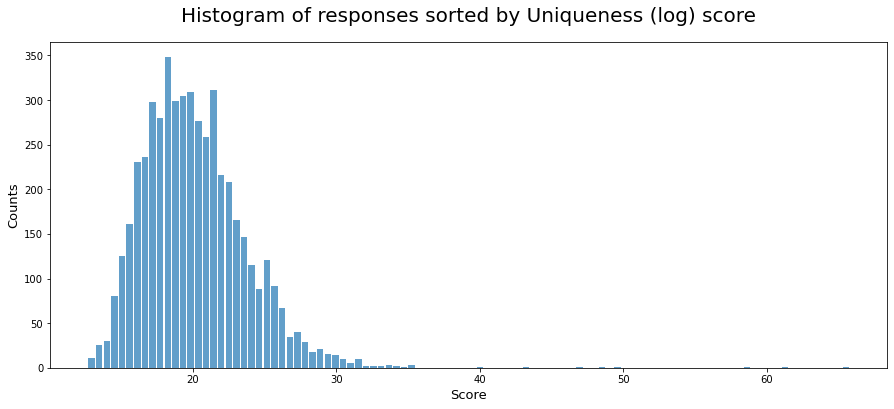

In [1567]:
fig, ax = plt.subplots(figsize=(15,6)) 
n, bins, patches = plt.hist(x=df2['Uniqueness'], bins='auto', alpha=0.7, rwidth=0.85)

ax.set_title("Histogram of responses sorted by Uniqueness (log) score",fontsize = 20, pad = 20);
ax.set_xlabel('Score',fontsize = 13)
ax.set_ylabel('Counts',fontsize = 13);

plt.show()

In [1579]:
kk = sorted(df2['Uniqueness'])
modeidx = list(n).index(n.max())
print(f"Mean: {np.mean(kk):.2f}, Mode: {bins[modeidx-1]:.2f}-{bins[modeidx]:.2f}, Median: {kk[len(kk)//2]}")

Mean: 20.15, Mode: 17.46-17.99, Median: 19.7161


An almost even bell curve of the log-score is seen when we plot a histogram of the uniqueness scores. For reference, the mean and median is around 20, while the mode is the scores between 17.46 and 17.99.

#### Correlation to Q15

To perform in a later, more motivated time

#### Clustering of Q12

To perform in a later, more motivated time